# <div style="text-align: center">18.335/6.337 Final Project - The L-BFGS algorithm</div>
# <div style="text-align: center">Visualization</div>
### <div style="text-align: center">Created by Yusu Liu and Simon Batzner</div>

Reference: http://tiao.io/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/

In [2]:
%matplotlib inline

In [3]:
# %%bash
# pip install mycli

In [4]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'r'

In [5]:
# params 
fun = 'rosenbrock'
x0 = [0.75, 2.0]

# load path
import h5py 
filename="path.jld"
file = h5py.File(filename, 'r')
data= file["pos"][()]
file.close()
julia_path = data[:, :]
print(julia_path.shape)
julia_path

(2, 28)


array([[ 0.75      ,  1.29955772,  1.29410867,  1.2944143 ,  1.21400045,
         1.12804001,  1.12981134,  1.09035576,  1.02249947,  1.01999248,
         1.01171415,  1.00776097,  1.00283829,  0.99772689,  0.99789857,
         0.99873941,  0.99911586,  0.9998166 ,  1.00005042,  1.00002291,
         1.00001755,  0.99999599,  0.99999652,  0.99999798,  0.99999966,
         1.00000086,  1.00000005,  1.00000001],
       [ 2.        ,  1.67619895,  1.6776566 ,  1.67654558,  1.46803255,
         1.26732017,  1.2786094 ,  1.18719914,  1.04302875,  1.04073264,
         1.02356535,  1.01639739,  1.00581363,  0.99553154,  0.9957378 ,
         0.9974637 ,  0.99815507,  0.99962169,  1.00009496,  1.0000504 ,
         1.00003556,  0.99999202,  0.99999287,  0.99999591,  0.99999914,
         1.00000182,  1.0000001 ,  1.00000001]])

In [6]:
if fun == 'rosenbrock': 
    # rosenbrock
    f = lambda x, y: (1-x)**2+100*(y-x**2)**2
    
elif fun == 'himmelblau': 
    # himmelblau
    f = lambda x, y: (x**2+y-11)**2+(x+xy**2-7)**2

elif fun == 'both': 
    # booth
    f = lambda x, y: (x+2*y-7)**2+(2*x+x-5)**2

elif fun == 'bohachesvky1': 
    # bohachevsky1
    f = lambda x, y: x**2+2*y**2-0.3*cos(3*pi*x)-0.4*cos(4*pi*y)+0.7

elif fun == 'easom': 
    # easom
    f = lambda x, y: -cos(x)*cos(y)*exp(-(x-pi)**2-(y-pi)**2)

In [7]:
xmin, xmax, xstep =  0, 2, .01
ymin, ymax, ystep = 0., 2.5, .01

In [8]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [9]:
z = f(x, y)

In [10]:
minima = np.array([1., 1.])

In [11]:
f(*minima)

0.0

In [12]:
minima_ = minima.reshape(-1, 1)
minima_

array([[ 1.],
       [ 1.]])

In [13]:
f(*minima_)

array([ 0.])

## 3D Surface Plot

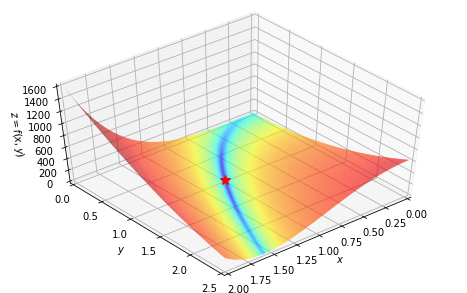

In [14]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d', elev=50, azim=50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z = f(x,y)$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [15]:
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

/anaconda3/envs/py3.5/lib/python3.5/site-packages/matplotlib/contour.py:1484: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


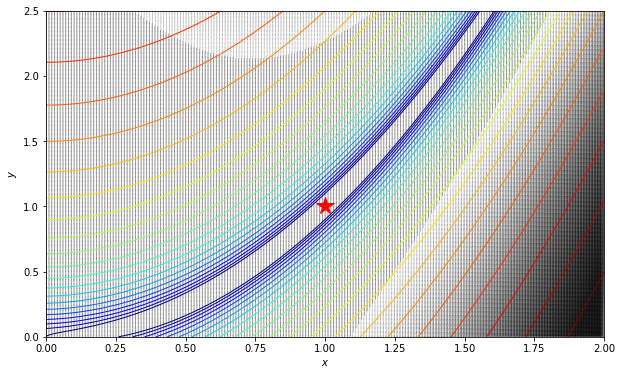

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

# Show Path on Contour Plot

/anaconda3/envs/py3.5/lib/python3.5/site-packages/matplotlib/contour.py:1484: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


(0.0, 2.5)

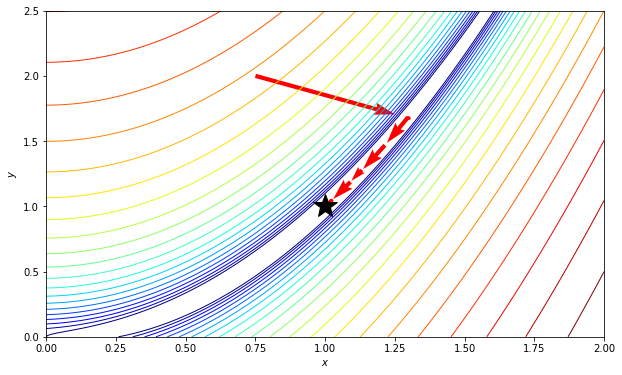

In [17]:
path = julia_path
fig, ax = plt.subplots(figsize=(15, 10))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1.1, color='r')
ax.plot(*minima_, 'k*', markersize=25)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

# Show path on 3D plot

(0.0, 2.5)

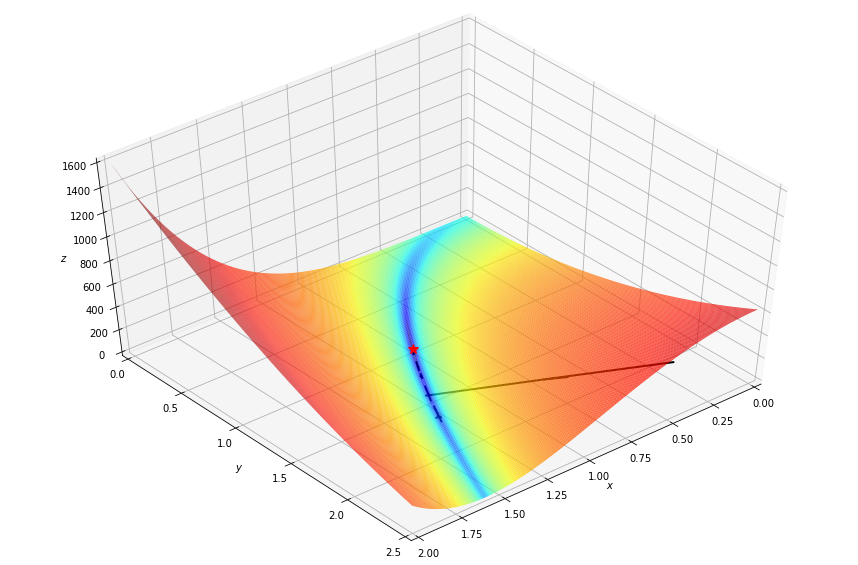

In [18]:
path = julia_path

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['lines.markersize'] = 3

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d', elev=50, azim=50)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.quiver(julia_path[0,:-1], julia_path[1,:-1], f(*julia_path[::,:-1]), 
          julia_path[0,1:]-julia_path[0,:-1], julia_path[1,1:]-julia_path[1,:-1], f(*(julia_path[::,1:]-julia_path[::,:-1])), 
          color='k', length = 0.2)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

# Video

/anaconda3/envs/py3.5/lib/python3.5/site-packages/matplotlib/contour.py:1484: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


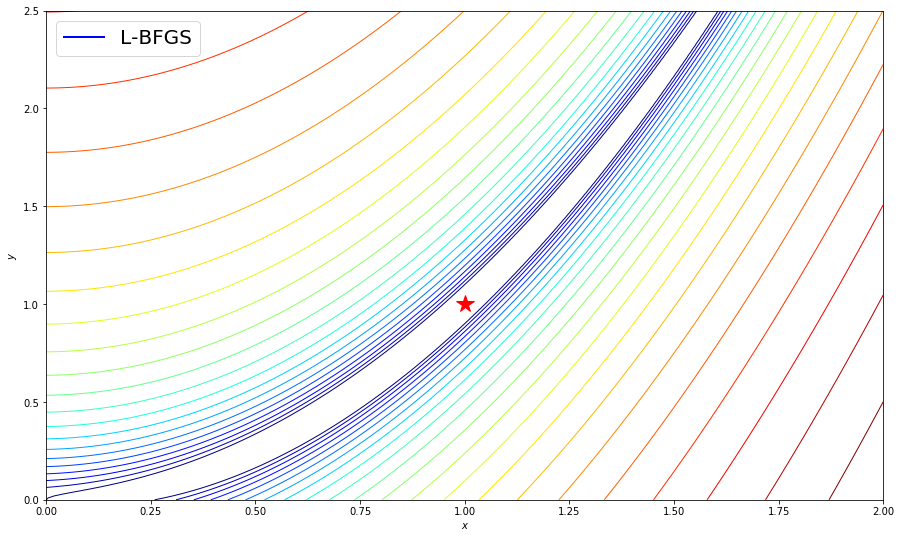

In [19]:
plt.rcParams['lines.linewidth'] = 1
fig, ax = plt.subplots(figsize=(15, 10))
ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=18)

line, = ax.plot([], [], 'b', label='L-BFGS', lw=2)
point, = ax.plot([], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left', prop={'size': 20})

In [20]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point


In [21]:
def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

In [22]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

In [23]:
HTML(anim.to_html5_video())

(0.0, 2.5)

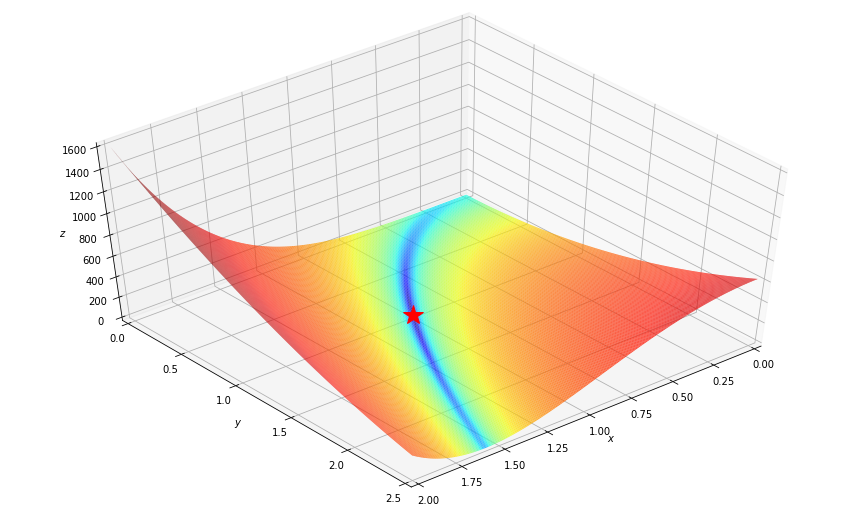

In [24]:
plt.rcParams['lines.linewidth'] = 2.5
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d', elev=50, azim=50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=20)

line, = ax.plot([], [], [], 'b', label='Newton-CG', lw=2)
point, = ax.plot([], [], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

In [25]:
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

In [26]:
def animate(i):
    line.set_data(path[0,:i], path[1,:i])
    line.set_3d_properties(f(*path[::,:i]))
    point.set_data(path[0,i-1:i], path[1,i-1:i])
    point.set_3d_properties(f(*path[::,i-1:i]))
    return line, point

In [27]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

In [28]:
HTML(anim.to_html5_video())

## Comparison against other scipy algorithms

In [29]:
func = value_and_grad(lambda args: f(*args))

In [30]:
def make_minimize_cb(path=[]):
    
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb

In [31]:
path_ = [x0]

In [32]:
res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20, callback=make_minimize_cb(path_))

In [33]:
dict(res)

{'fun': 1.5366033183924176e-15,
 'jac': array([  1.33253445e-08,   3.25031557e-08]),
 'message': 'Optimization terminated successfully.',
 'nfev': 36,
 'nhev': 0,
 'nit': 24,
 'njev': 135,
 'status': 0,
 'success': True,
 'x': array([ 1.00000004,  1.00000008])}

In [34]:
path = np.array(path_).T
path.shape

(2, 25)

/anaconda3/envs/py3.5/lib/python3.5/site-packages/matplotlib/contour.py:1484: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


(0.0, 2.5)

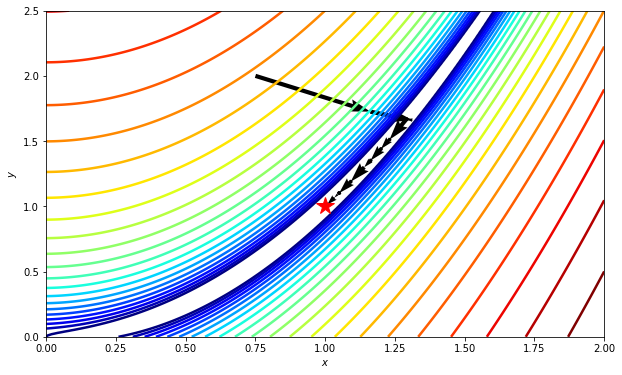

In [35]:
fig, ax = plt.subplots(figsize=(15,10))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

(0.0, 2.5)

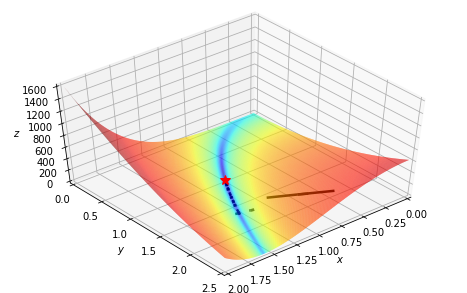

In [36]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d', elev=50, azim=50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], f(*path[::,:-1]), 
          path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], f(*(path[::,1:]-path[::,:-1])), 
          color='k', length = 0.2)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

/anaconda3/envs/py3.5/lib/python3.5/site-packages/matplotlib/contour.py:1484: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


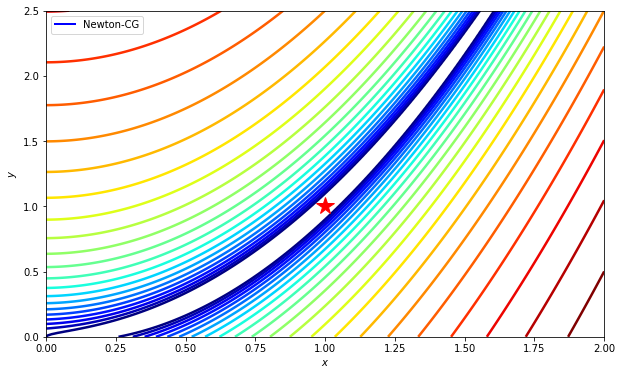

In [37]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=18)

line, = ax.plot([], [], 'b', label='Newton-CG', lw=2)
point, = ax.plot([], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [38]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

In [39]:
def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

In [40]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

In [41]:
HTML(anim.to_html5_video())

(0.0, 2.5)

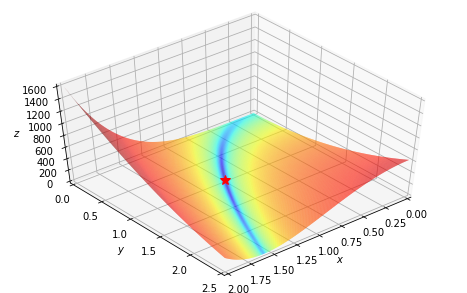

In [42]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d', elev=50, azim=50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

line, = ax.plot([], [], [], 'b', label='Newton-CG', lw=2)
point, = ax.plot([], [], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

In [43]:
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

In [44]:
def animate(i):
    line.set_data(path[0,:i], path[1,:i])
    line.set_3d_properties(f(*path[::,:i]))
    point.set_data(path[0,i-1:i], path[1,i-1:i])
    point.set_3d_properties(f(*path[::,i-1:i]))
    return line, point

In [45]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

In [46]:
HTML(anim.to_html5_video())

In [47]:
class TrajectoryAnimation(animation.FuncAnimation):
    
    def __init__(self, *paths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths

        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]
        self.points = [ax.plot([], [], 'o', color=line.get_color())[0] 
                       for line in self.lines]

        super(TrajectoryAnimation, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line, point in zip(self.lines, self.points):
            line.set_data([], [])
            point.set_data([], [])
        return self.lines + self.points

    def animate(self, i):
        for line, point, path in zip(self.lines, self.points, self.paths):
            line.set_data(*path[::,:i])
            point.set_data(*path[::,i-1:i])
        return self.lines + self.points

In [48]:
class TrajectoryAnimation3D(animation.FuncAnimation):
    
    def __init__(self, *paths, zpaths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths
        self.zpaths = zpaths
        
        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]

        super(TrajectoryAnimation3D, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line in self.lines:
            line.set_data([], [])
            line.set_3d_properties([])
        return self.lines

    def animate(self, i):
        for line, path, zpath in zip(self.lines, self.paths, self.zpaths):
            line.set_data(*path[::,:i])
            line.set_3d_properties(zpath[:i])
        return self.lines

In [49]:
methods = [
    "CG",
#   "BFGS",
    "Newton-CG",
    "L-BFGS-B",
    "TNC",
    "SLSQP",
#   "dogleg",
#   "trust-ncg"
]

In [50]:
minimize_ = partial(minimize, fun=func, x0=x0, jac=True, bounds=[(xmin, xmax), (ymin, ymax)], tol=1e-20)

In [51]:
paths_ = defaultdict(list)
for method in methods:
    paths_[method].append(x0)

In [52]:
results = {method: minimize_(method=method, callback=make_minimize_cb(paths_[method])) for method in methods}

/anaconda3/envs/py3.5/lib/python3.5/site-packages/scipy/optimize/_minimize.py:430: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
/anaconda3/envs/py3.5/lib/python3.5/site-packages/scipy/optimize/_minimize.py:430: RuntimeWarning: Method Newton-CG cannot handle constraints nor bounds.
  RuntimeWarning)


In [53]:
paths = [np.array(paths_[method]).T for method in methods]

#append our Julia data
paths.append(julia_path)
methods.append("Our L-BFGS implementation")
# print(methods)

In [54]:
zpaths = [f(*path) for path in paths]

/anaconda3/envs/py3.5/lib/python3.5/site-packages/matplotlib/contour.py:1484: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


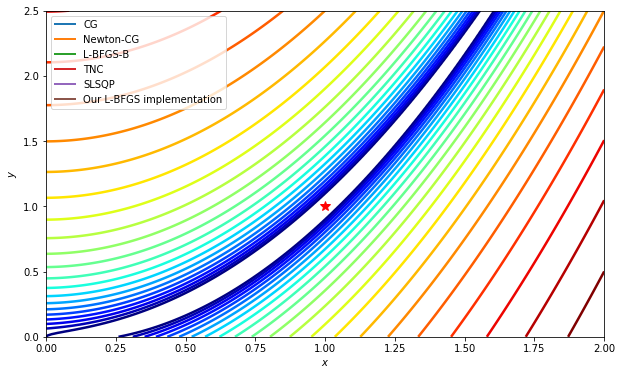

In [55]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation(*paths, labels=methods, ax=ax)

ax.legend(loc='upper left')

In [56]:
HTML(anim.to_html5_video())

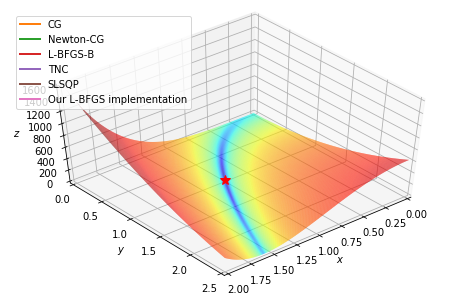

In [57]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d', elev=50, azim=50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation3D(*paths, zpaths=zpaths, labels=methods, ax=ax)

ax.legend(loc='upper left')

In [ ]:
HTML(anim.to_html5_video())